In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import lovelyplots
import matplotlib.pyplot as plt
plt.style.use(['ipynb'])
import numpy as np

In [159]:
df = pd.read_csv("nsight_processed.csv")


In [3]:
def query_table(df, irreps_type, tensor_product_type, property):
    return df[(df['irreps_type'] == irreps_type) \
        & (df['tensor_product_type'] == tensor_product_type) \
        & (~df['lmax'].isin([7,8]))][property]

def plot_walltimes_gpu(irreps_type):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", "lmax"), query_table(df, f"{irreps_type}","CGTP-dense" , "Time")*1000, label="Clebsch-Gordan (Naive)")
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", "Time")*1000, label="Clebsch-Gordan (Sparse)")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", "Time")*1000, label="Gaunt (Naive Grid)", marker="^")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", "Time")*1000, label="Gaunt (Original Grid)", marker="^")
    plt.ylabel("Walltime (ms)")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**2)
    plt.xticks(range(1, 7))
    plt.title(f"Walltime (GPU) for {irreps_type}")
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/walltime_gpu_{irreps_type}.pdf")
    plt.show()
    

def plot_gflops_s_gpu(irreps_type):
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", "GB/s (max)"), label="Clebsch-Gordan (Naive)")
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", "GB/s (min)"), label="Clebsch-Gordan (Sparse)")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", "GB/s (min)"), label="Gaunt (Naive)", marker="^")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", "GB/s (min)"), label="Gaunt (Original)", marker="^")
    plt.ylabel("GFLOP/s")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**6)
    plt.text(4.3, 35500, "FP32: 17.05 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(17050, linestyle='--', color='red')
    plt.text(4.68, 315500, "Tensor Core: 136.4 TFLOP/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(136400, linestyle='--', color='blue')
    plt.xticks(range(1, 7))
    plt.yticks([10**i for i in range(-3, 7)])
    plt.title(f"Peak Throughput for {irreps_type}")
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/peak_glfops_{irreps_type}.pdf")
    plt.show()



def plot_gb_s_gpu(irreps_type):
    # ax, fig = plt.subplots(figsize=(10,6))
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-dense", "lmax"), query_table(df, f"{irreps_type}", "CGTP-dense", "GB/s (min)"), label="Clebsch-Gordan (Naive)")
    plt.semilogy(query_table(df, f"{irreps_type}", "CGTP-sparse", "lmax"), query_table(df, f"{irreps_type}", "CGTP-sparse", "GB/s (min)"), label="Clebsch-Gordan (Sparse)")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-grid", "lmax"), query_table(df, f"{irreps_type}", "GTP-grid", "GB/s (min)"), label="Gaunt (Naive)", marker="^")
    plt.semilogy(query_table(df, f"{irreps_type}", "GTP-fourier", "lmax"), query_table(df, f"{irreps_type}", "GTP-fourier", "GB/s (min)"), label="Gaunt (Original)", marker="^")
    plt.ylabel("GB/s")
    plt.xlabel("$L_{max}$")
    plt.text(4.3, 1500, "DRAM: 768 GB/s", horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    plt.axhline(768, linestyle='--', color='blue')
    plt.xticks(range(1, 7))
    plt.title(f"Peak Bandwidth for {irreps_type}")
    # plt.legend(fontsize=10, loc='upper left')
    plt.ylim(10**-3, 10**3.5)
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/peak_gbs_{irreps_type}.pdf")
    plt.show()

    

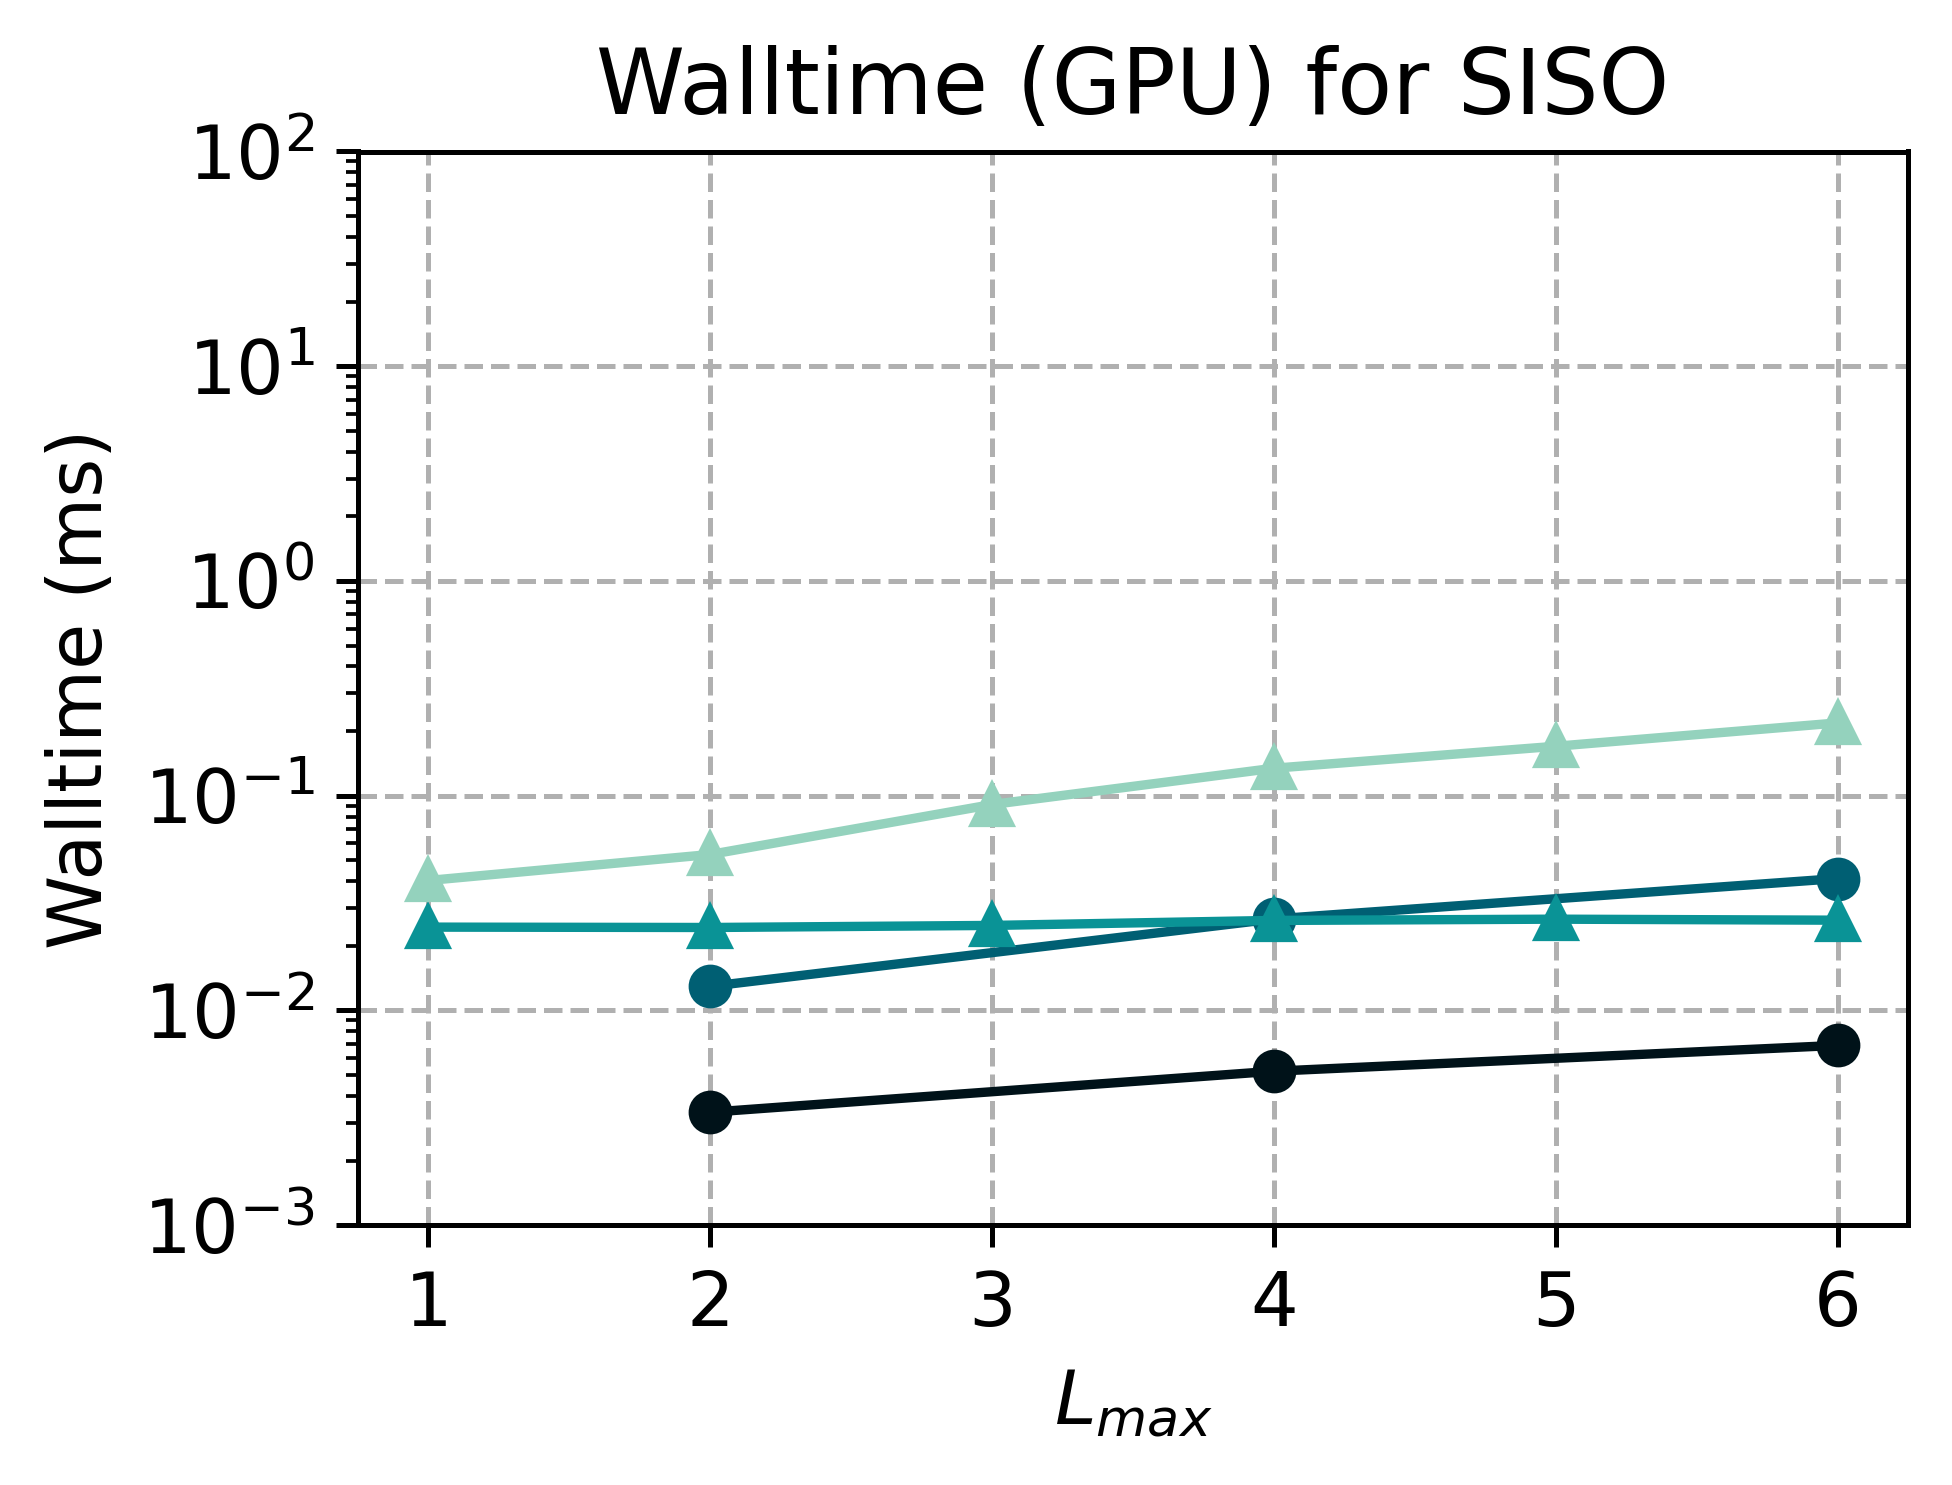

In [179]:

plot_walltimes_gpu("SISO")
# plot_walltimes_gpu("SIMO")
# plot_walltimes_gpu("MIMO")

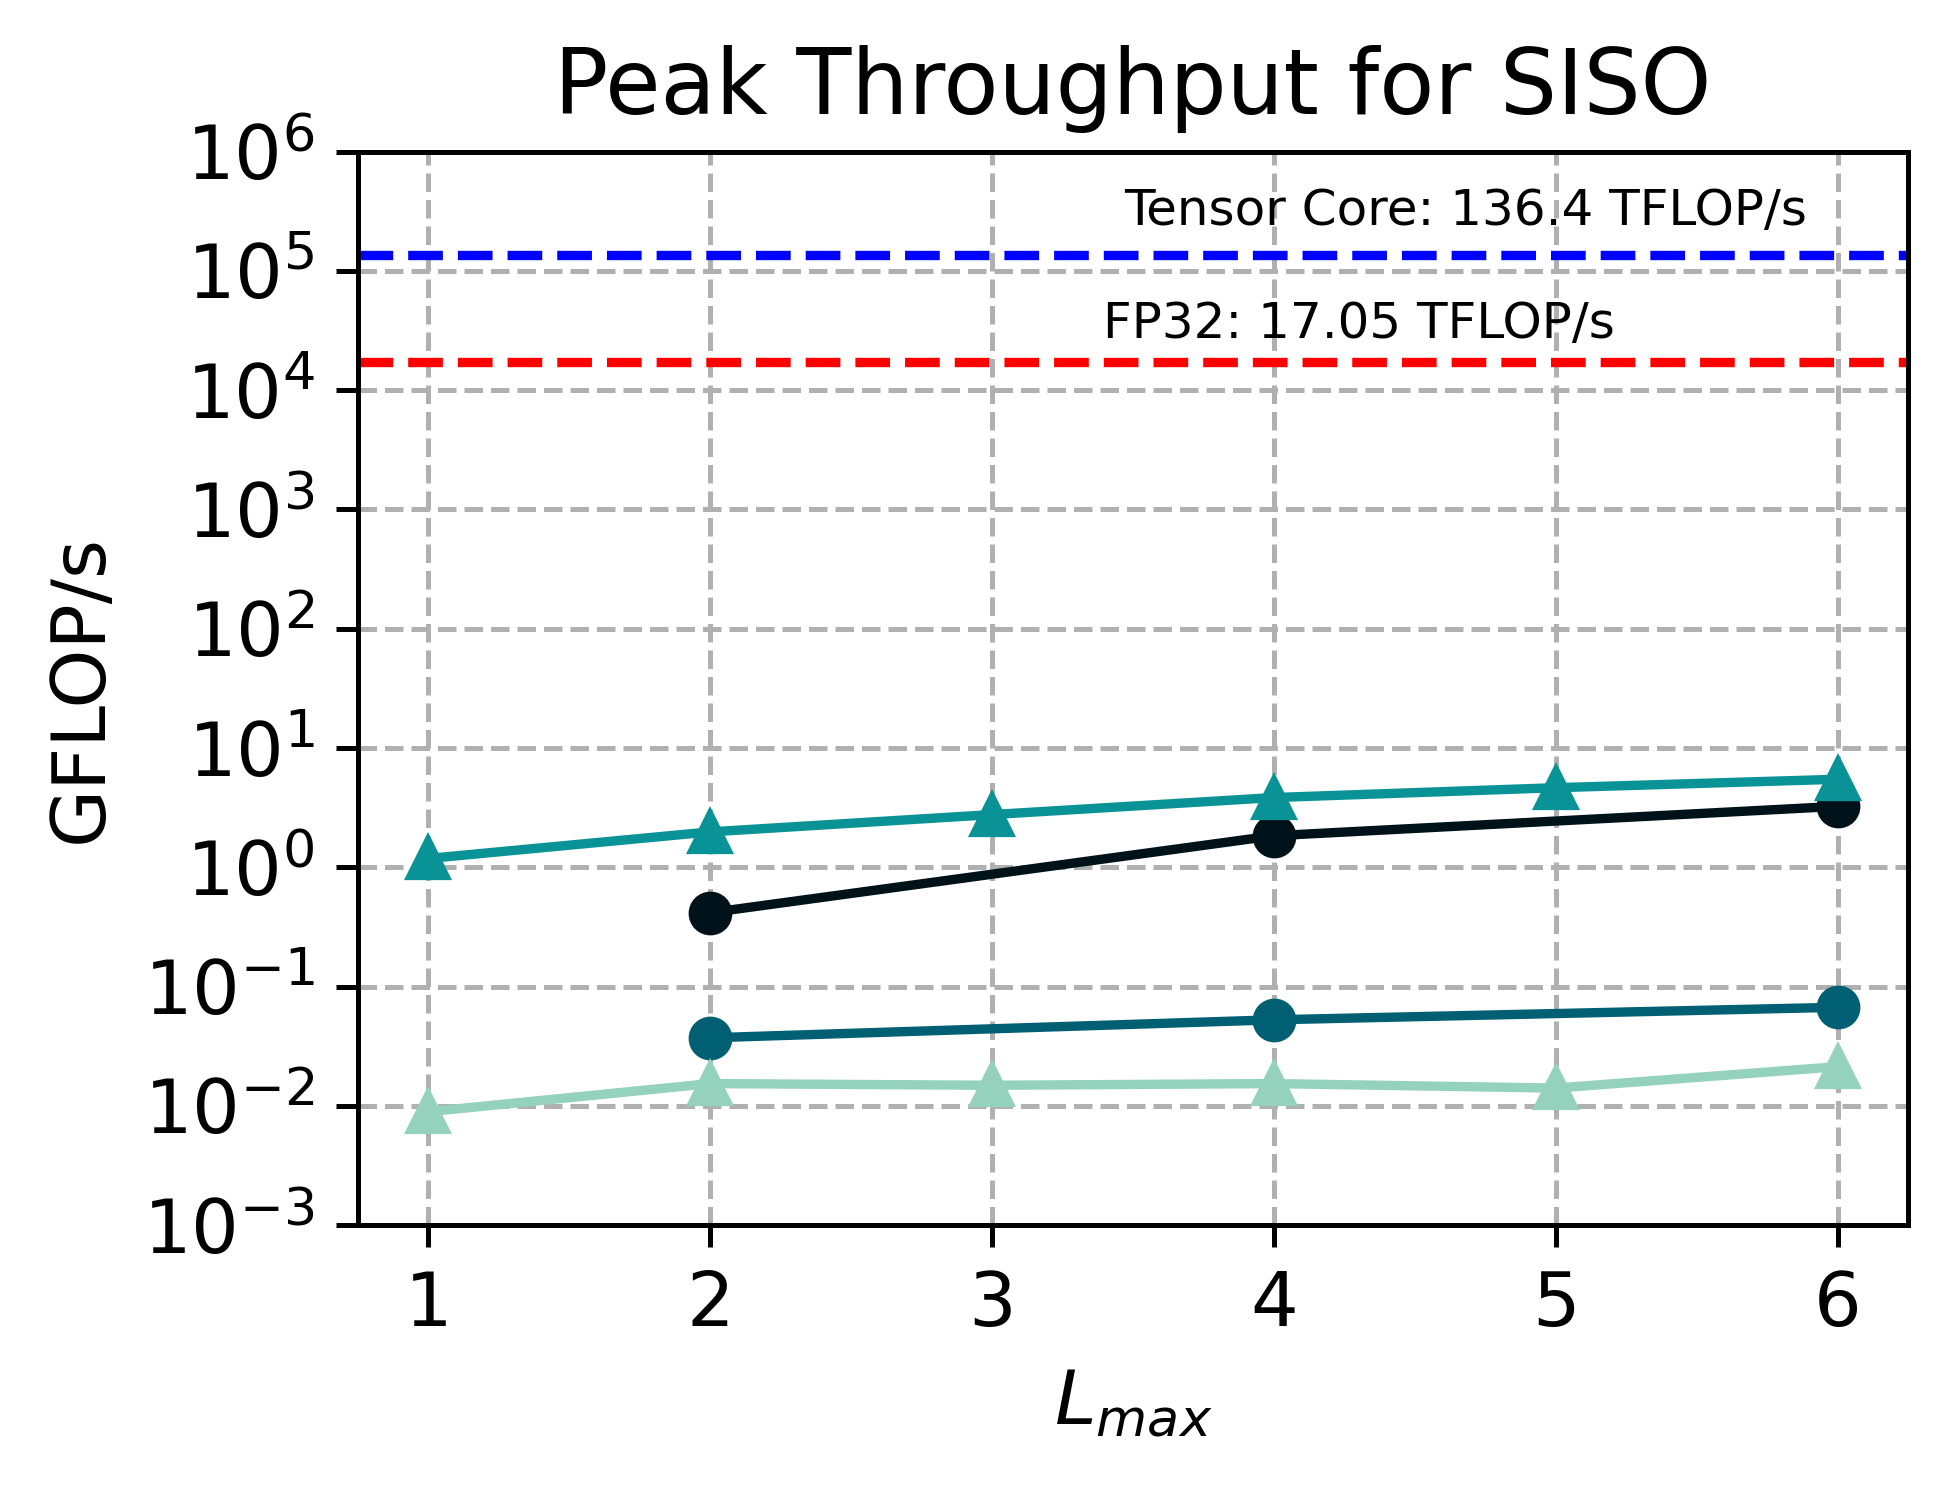

In [180]:
plot_gflops_s_gpu("SISO")
# plot_gflops_s_gpu("SIMO")
# plot_gflops_s_gpu("MIMO")

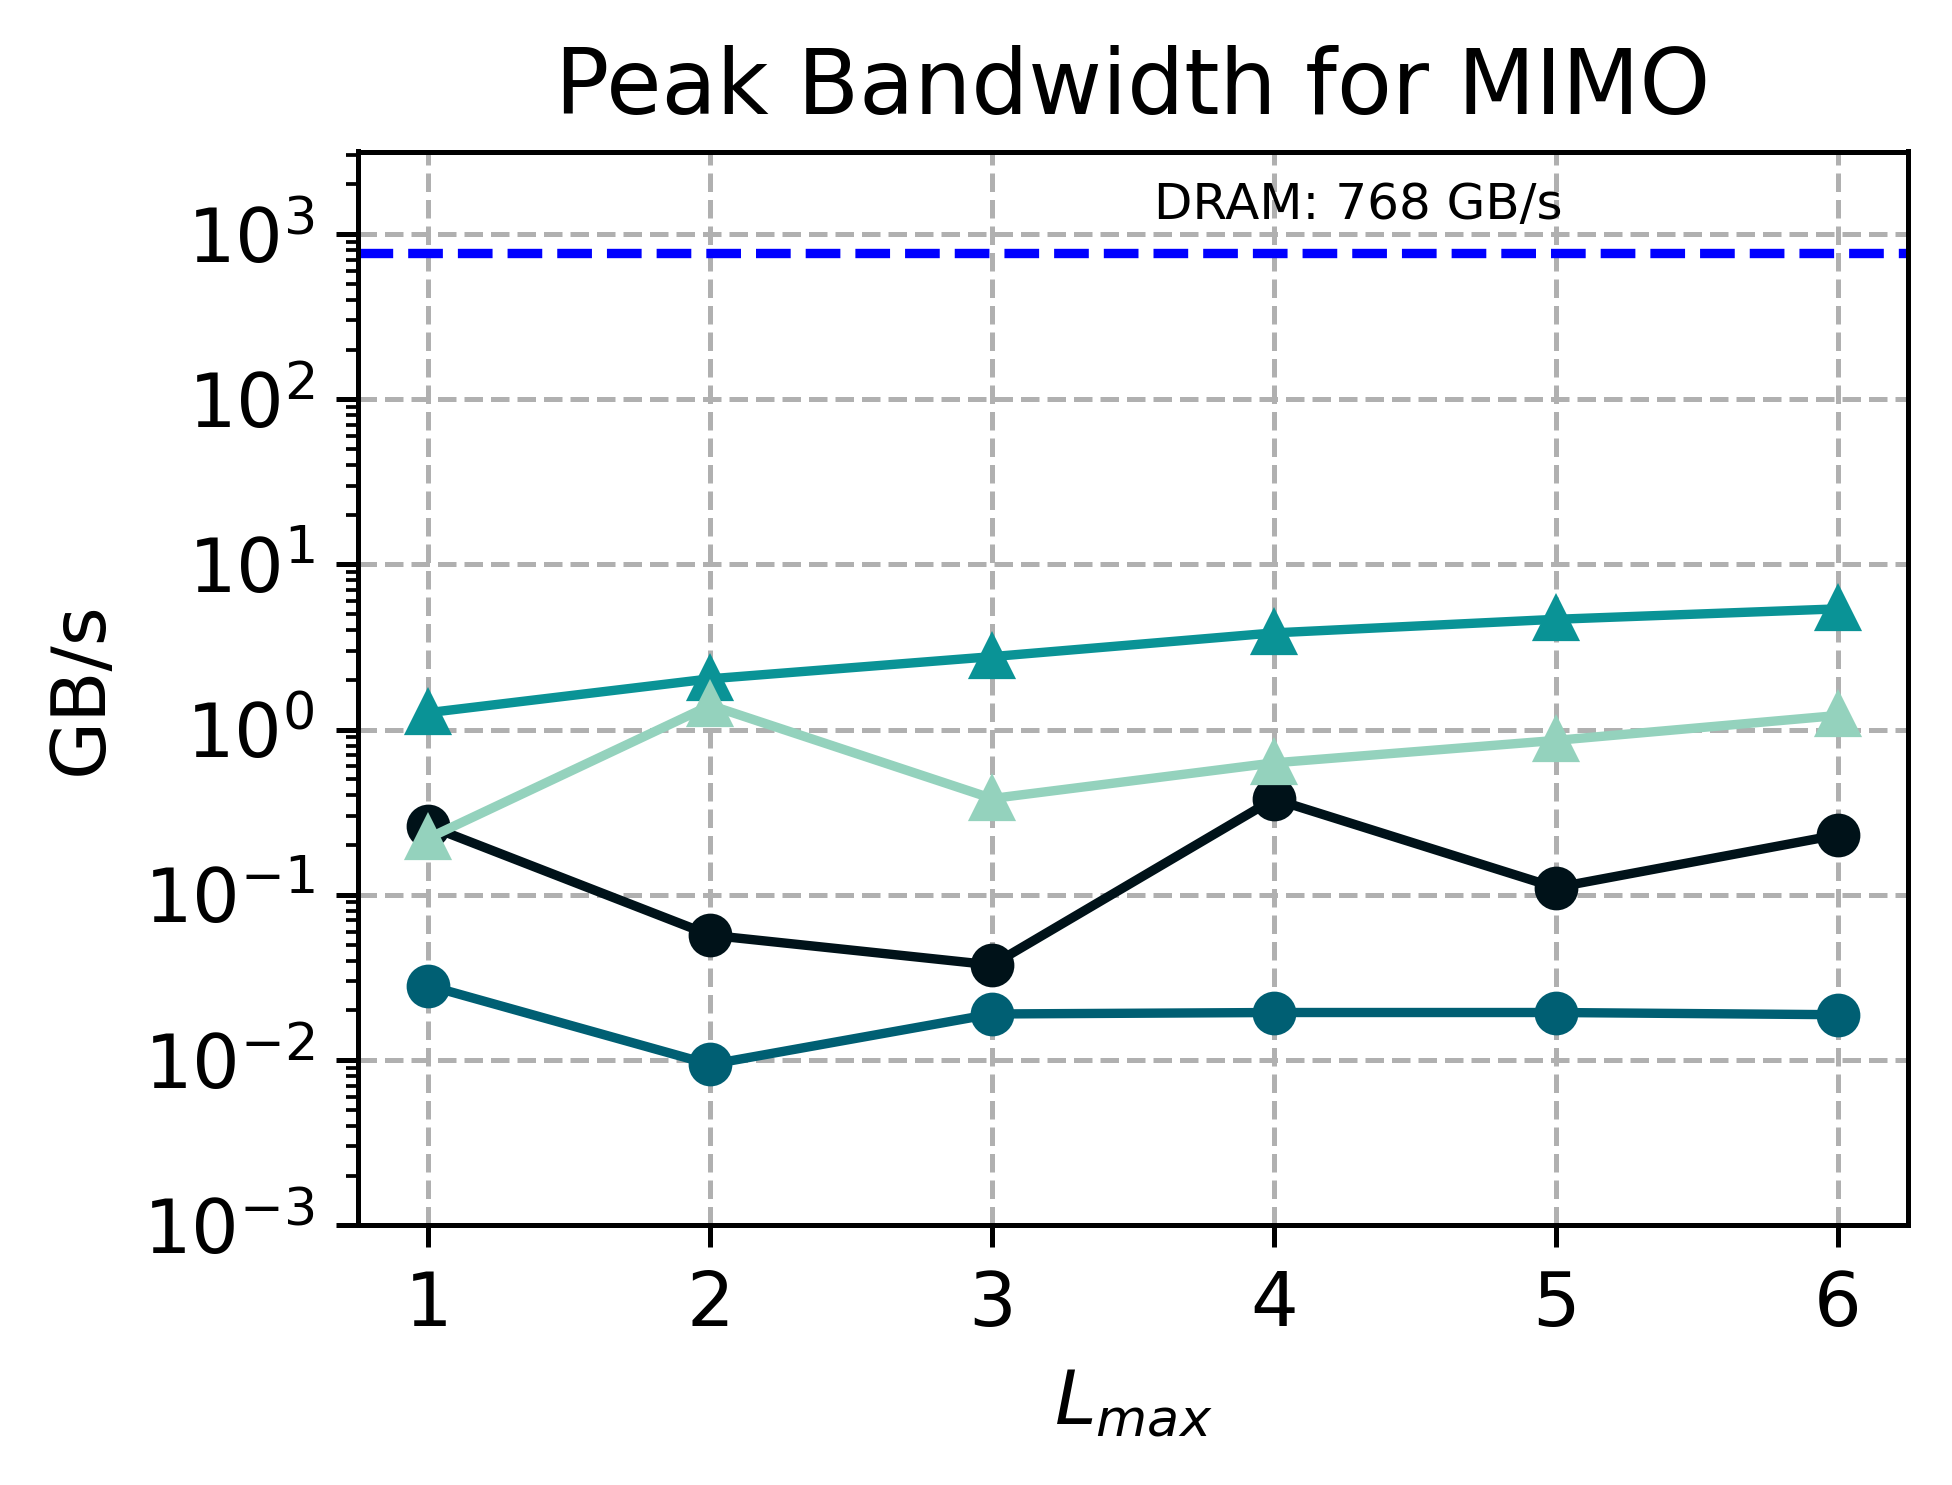

In [152]:

# plot_gb_s_gpu("SISO")
# plot_gb_s_gpu("SIMO")
plot_gb_s_gpu("MIMO")

In [4]:
df_cpu = pd.read_csv("cpu_processed.csv")
df_cpu

,lmax,irreps_type,tensor_product_type,wall_time_cpu
0,1,SISO,CGTP-dense,0.000010
1,2,SISO,CGTP-dense,0.000011
2,3,SISO,CGTP-dense,0.000009
3,4,SISO,CGTP-dense,0.000014
4,5,SISO,CGTP-dense,0.000010
...,...,...,...,...
90,8,SIMO,GTP-fourier,0.180614
91,3,SIMO,GTP-fourier,0.001521
92,4,SIMO,GTP-fourier,0.006251
93,5,SIMO,GTP-fourier,0.027794


In [5]:
def plot_walltimes_cpu(irreps_type):
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "CGTP-dense", "lmax"), query_table(df_cpu, f"{irreps_type}", "CGTP-dense", "wall_time_cpu")*1000, label="Clebsch-Gordan (Naive)")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "CGTP-sparse", "lmax"), query_table(df_cpu, f"{irreps_type}", "CGTP-sparse", "wall_time_cpu")*1000, label="Clebsch-Gordan (Sparse)")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "GTP-grid", "lmax"), query_table(df_cpu, f"{irreps_type}", "GTP-grid", "wall_time_cpu")*1000, label="Gaunt (Naive)", marker="^")
    plt.semilogy(query_table(df_cpu, f"{irreps_type}", "GTP-fourier", "lmax"), query_table(df_cpu, f"{irreps_type}", "GTP-fourier", "wall_time_cpu")*1000, label="Gaunt (Original)", marker="^")
    plt.ylabel("Walltime (ms)")
    plt.xlabel("$L_{max}$")
    plt.ylim(10**-3, 10**2)
    plt.xticks(range(1, 7))
    plt.title(f"Walltime (CPU) for {irreps_type}")
    # ax.legend(fontsize=10, loc='upper left')
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.savefig(f"plots/walltime_cpu_{irreps_type}.pdf")
    plt.show()
    

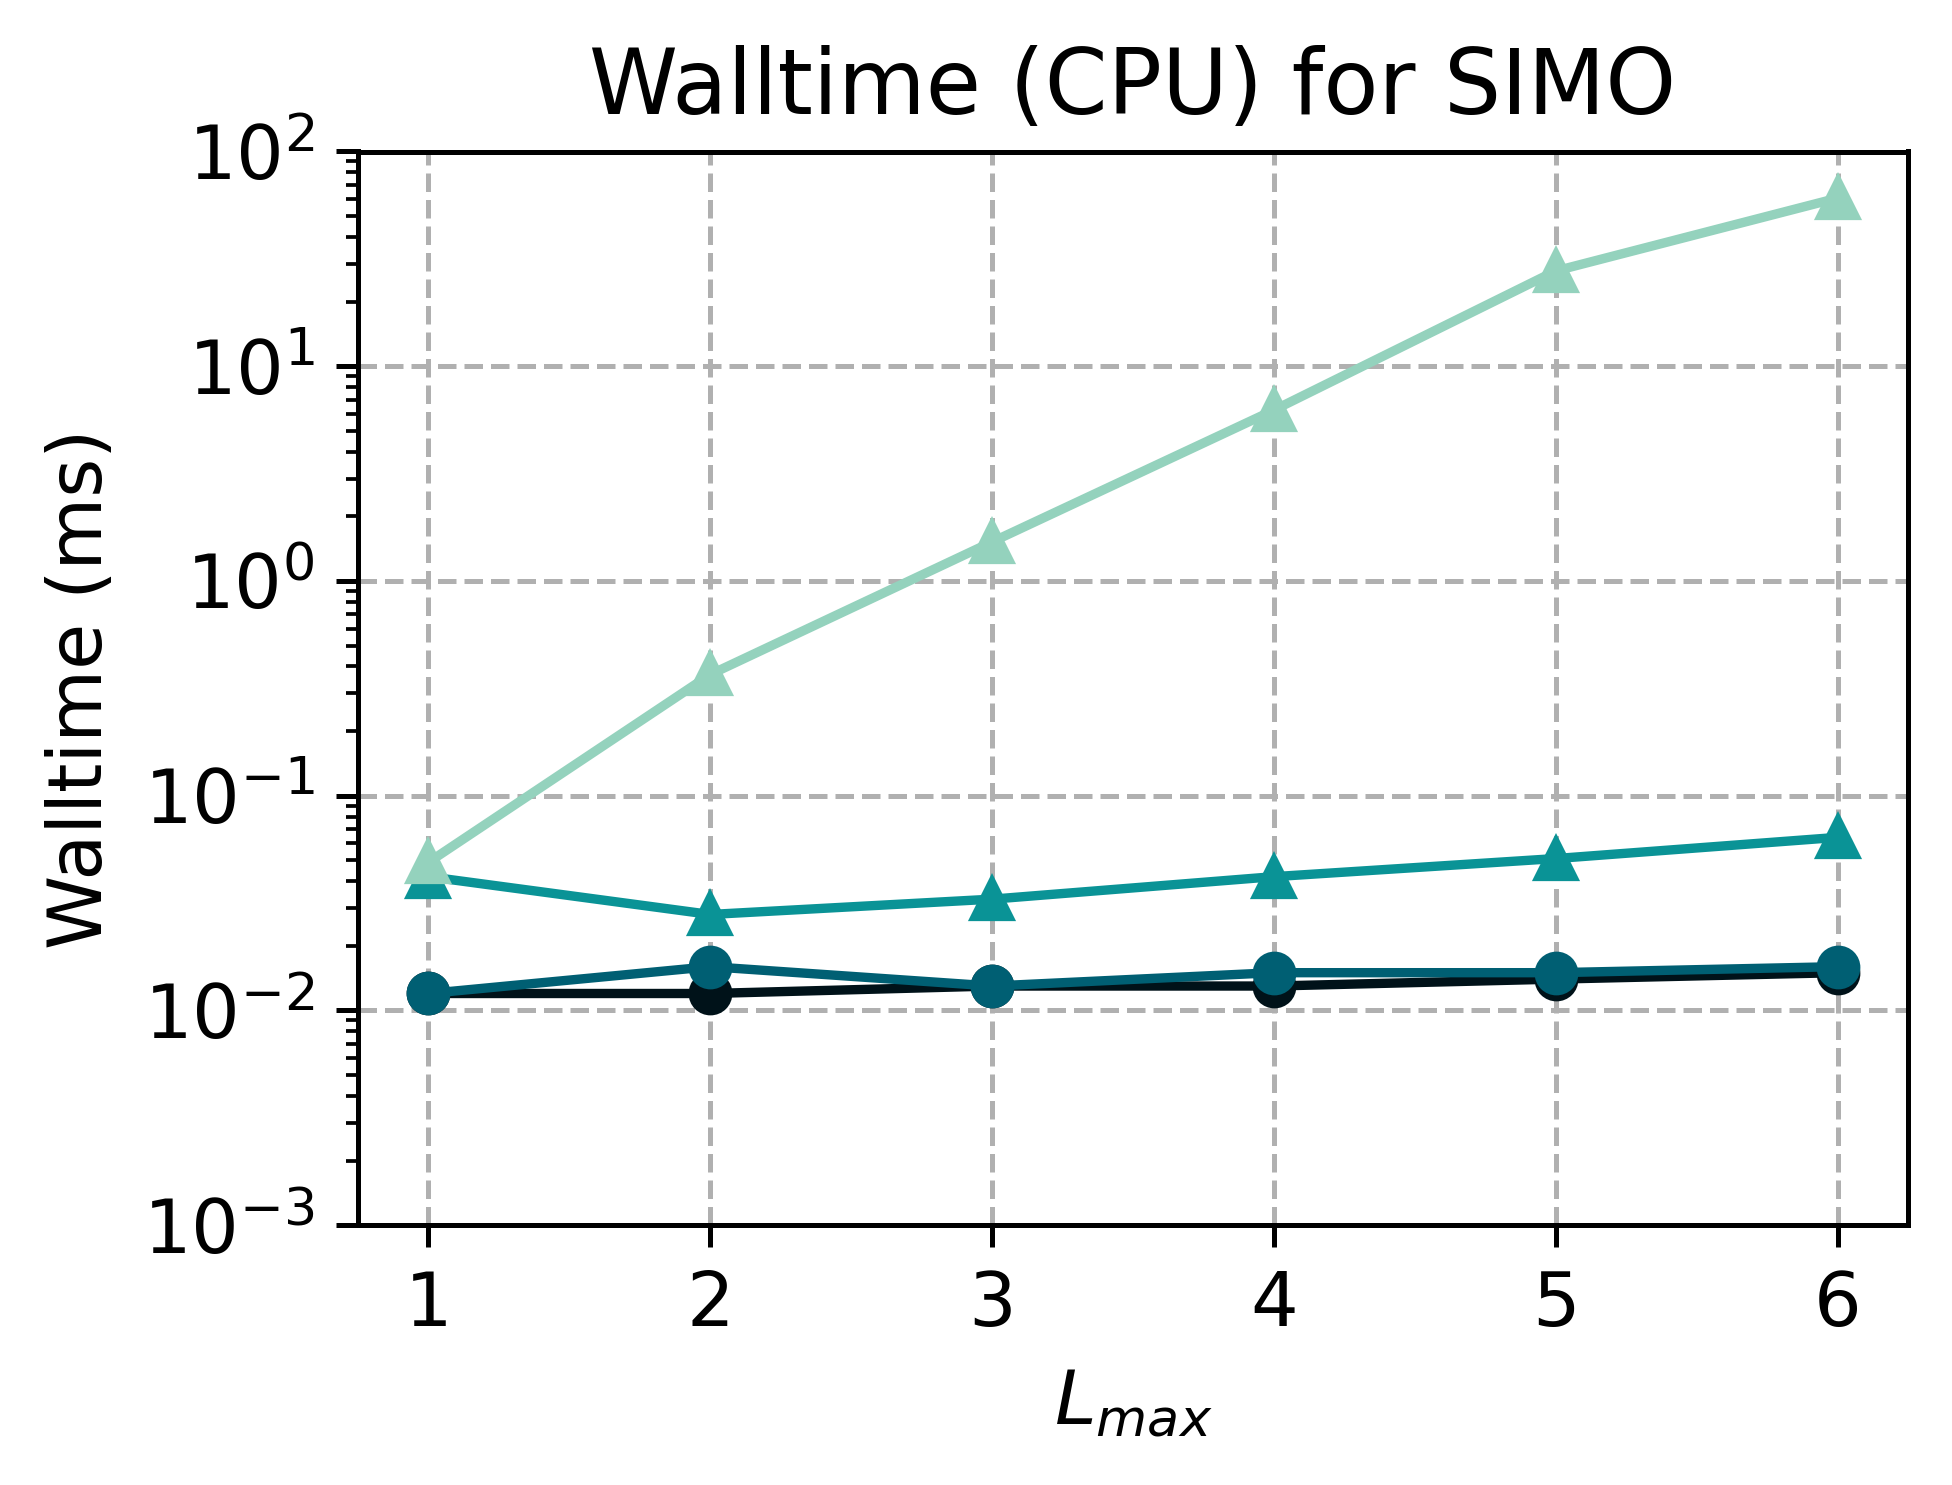

In [6]:
plot_walltimes_cpu("SIMO")